## 정렬

**버블 정렬**

- n번의 라운로 이뤄짐, 각 라운드 마다 배열의 아이템(값)을 한 번씩 살펴봄
 - 배열 전체를 살펴보는 것을 n번 하기 때문에 시간 복잡도는 항상 O(n^2)
 - 구현이 느린 정렬 알고리즘

```
Bubblesort(A)
  for i from 1 to A.length # 기본 라운드
    for j from 0 to A.length - 1 # 이후 라운드
	    if A[j] > A[j + 1]
            swap A[j] with a[j + 1]
```
- 실무에서 잘 사용되지 않음

**병합 정렬**
- 퀵 정렬보다 느리지만 안정 정렬이라는 점에서 많이 사용

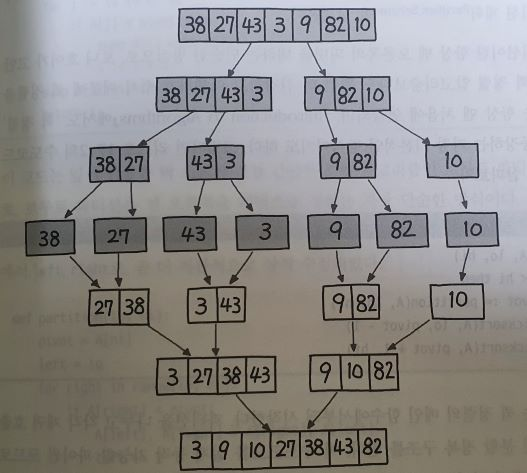

- 더 이상 쪼갤 수 없을 때까지 분할하고(38 27 43 3 9 82 10), 재 정렬 함

**퀵 정렬**

- 피벗을 기준으로 좌우로 나눔(작으면 왼쪽, 크면 오른쪽)
 - 파티션 교환 정렬이라 부름
- 병합 정렬과 같은 분할 정복 알고리즘


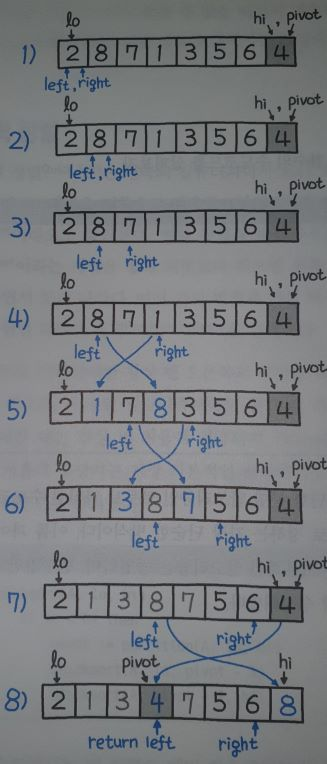

- 피벗 값보다 작으면 왼쪽에 크면 오른쪽에 정렬
- right 포인트가 끝에 도달하면 피벗 값과 중앙의 값의 위치가 변경

**안정 정렬 vs 불안정 정렬**

- 택배 발송 로그로 정렬 확인해 보기

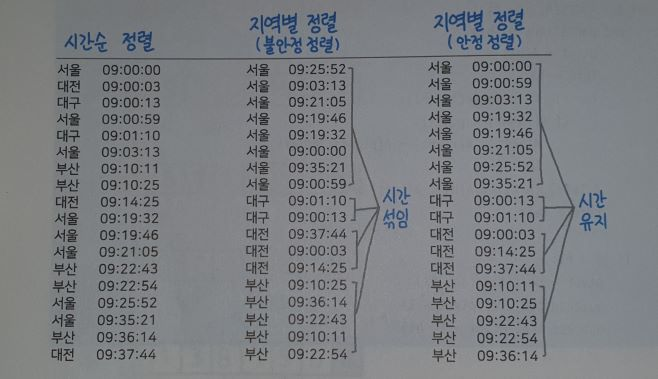

- 정렬
 - 안정 정렬: 기존에 정렬했던 방식에서 다른 방식의 정렬을 하여도 기존의 정렬이 유지
   - 안정 정렬: 병합 정렬, 버블 정렬
 - 불안정 정렬: 기존에 정렬했던 방식에서 다른 방식의 정렬을 하게되면 기존의 정렬이 무시
   - 불안정 정렬: 퀵 정렬

### 리스트 정렬

- 입력

```
4 -> 2 -> 1 -> 3
```
- 출력

```
1 -> 2 -> 3 -> 4
```


#### 1. 병합 정렬




In [9]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution:
    # 두 정렬 리스트 병합
    def mergeTwoLists(self, l1: ListNode, l2: ListNode) -> ListNode:
        if l1 and l2:
            if l1.val > l2.val:
                l1, l2 = l2, l1
            l1.next = self.mergeTwoLists(l1.next, l2)

        return l1 or l2

    def sortList(self, head: ListNode) -> ListNode:
        if not (head and head.next):
            return head

        # 런너 기법 활용
        half, slow, fast = None, head, head
        while fast and fast.next:
            half, slow, fast = slow, slow.next, fast.next.next
        half.next = None

        # 분할 재귀 호출
        l1 = self.sortList(head)
        l2 = self.sortList(slow)

        return self.mergeTwoLists(l1, l2)


if __name__ == '__main__':
  s = Solution()
  l1 = ListNode(4)
  l1.next = ListNode(2)
  l1.next.next = ListNode(1)
  l1.next.next.next = ListNode(3)

  head = s.sortList(l1)
  while head is not None:
    print(f'{head.val}', end = " ")
    head = head.next

1 2 3 4 

#### 2. 퀵 정렬

- 로무토 파티션 등의 인반적인 퀵정렬 알고리즘으로 구현하면, 타임아웃이 발생되 풀이가 불가능
- 퀵 정렬은 불안정 정렬로, 같은 값이 반복될 경우에도 계속 스왑을 시도
 - 연결리스트 특성상 피벗을 임의로 지정하기가 어려워 정렬된 리스트가 입력값으로 들어오면 계속해서 불균형 리스트로 나뉘어 최악의 결과를 보일 수 있음 

#### 3. 내장 함수를 이용하는 실용적인 방법

- soet(), sorted()를 통해 효율적인 알고리즘을 제공
- 내장 함수가 알고리즘을 이용해 구현한 함수보다 속도면에서 빠름
- 실무에서 가장 많이 활용

In [ ]:
from typing import List


# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution:
    def sortList(self, head: ListNode) -> ListNode:
        # 연결 리스트 -> 파이썬 리스트
        p = head
        lst: List = []
        while p:
            # print(p)
            lst.append(p.val)
            p = p.next

        # 정렬
        lst.sort()

        # 파이썬 리스트 -> 연결 리스트
        p = head
        for i in range(len(lst)):
            p.val = lst[i]
            p = p.next
        return head

if __name__ == '__main__':
  s = Solution()
  a = ListNode(4)
  a.next = ListNode(2)
  a.next.next = ListNode(1)
  a.next.next.next = ListNode(3)
  print(a)
  head = s.sortList(a)
  while head is not None:
    print(f'{head.val}', end = " ")
    head = head.next

1 2 3 4 